In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("C:\\Users\\abdul\\Desktop\\Jupyter\\Datasets\\MSFT.csv")

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,4/17/2023,289.929993,291.600006,286.160004,288.799988,286.448975,23836200
1,4/18/2023,291.570007,291.760010,287.010010,288.369995,286.022522,20161800
2,4/19/2023,285.989990,289.049988,284.540009,288.450012,286.101898,17150300
3,4/20/2023,285.250000,289.029999,285.079987,286.109985,283.780914,23244400
4,4/21/2023,285.010010,286.269989,283.059998,285.760010,283.433777,21676400


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       250 non-null    object 
 1   Open       250 non-null    float64
 2   High       250 non-null    float64
 3   Low        250 non-null    float64
 4   Close      250 non-null    float64
 5   Adj Close  250 non-null    float64
 6   Volume     250 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.8+ KB


In [23]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open,250.0,3.559186e+02,3.870340e+01,2.795100e+02,3.265925e+02,3.396750e+02,3.858725e+02,4.298300e+02
High,250.0,3.589374e+02,3.863274e+01,2.816000e+02,3.303250e+02,3.433650e+02,3.897525e+02,4.308200e+02
Low,250.0,3.528789e+02,3.854524e+01,2.753700e+02,3.243950e+02,3.371000e+02,3.835825e+02,4.271600e+02
Close,250.0,3.560748e+02,3.877714e+01,2.754200e+02,3.275575e+02,3.406050e+02,3.875100e+02,4.293700e+02
Adj Close,250.0,3.548644e+02,3.944626e+01,2.731780e+02,3.258654e+02,3.388690e+02,3.867947e+02,4.293700e+02
Volume,250.0,2.491928e+07,9.546488e+06,1.017660e+07,1.944010e+07,2.248595e+07,2.701515e+07,7.847820e+07


Text(0.5, 1.0, 'Microsoft Stock Prices')

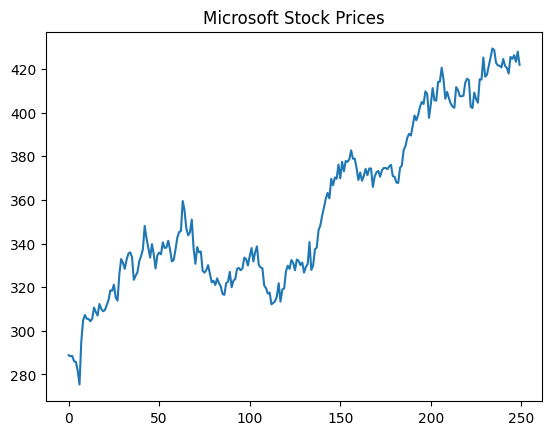

In [16]:
plt.plot(df['Close'])
plt.title("Microsoft Stock Prices")

<Axes: >

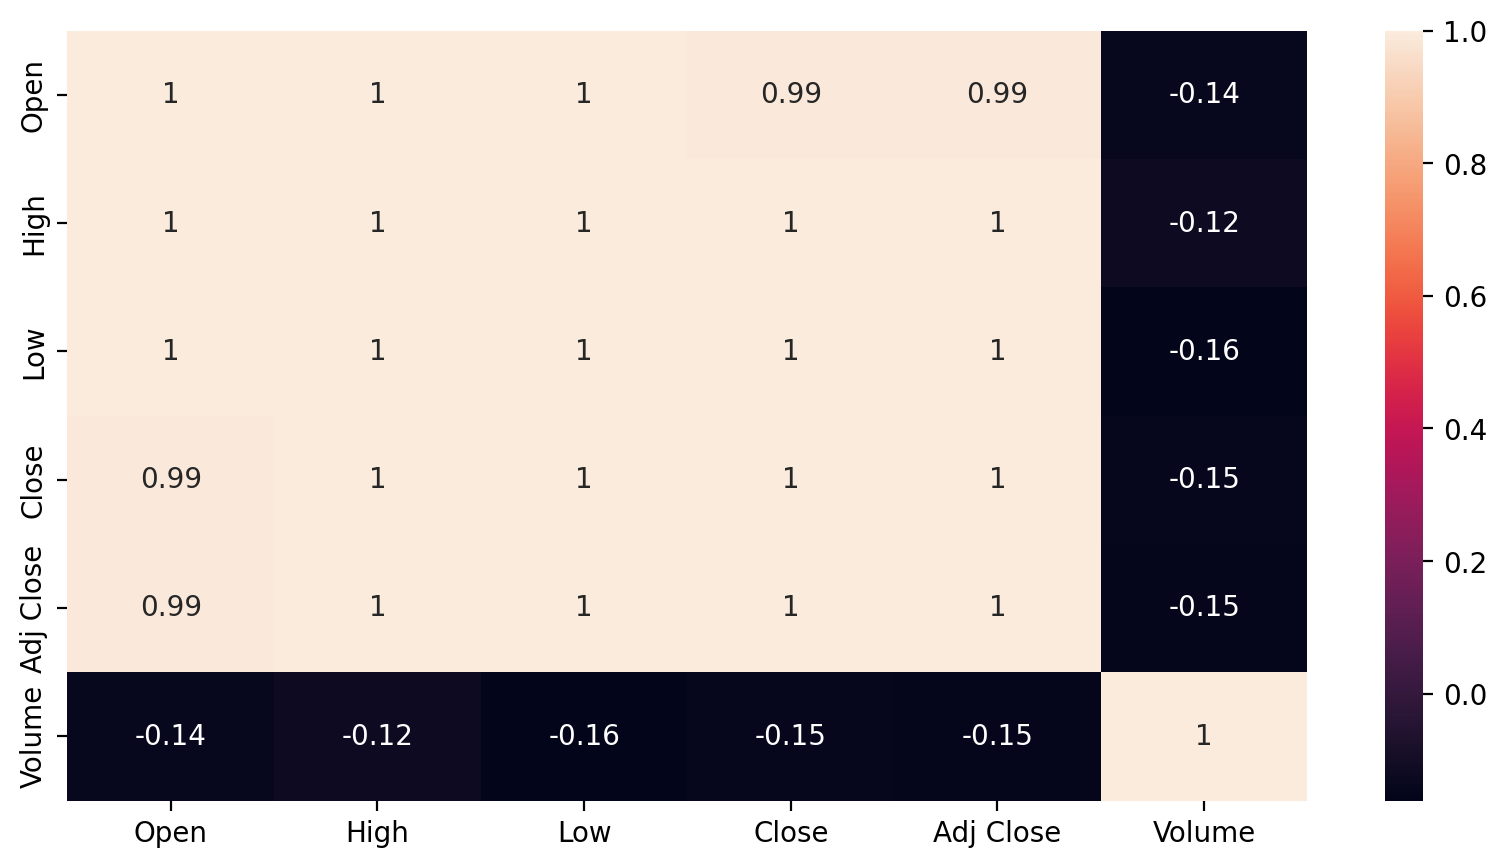

In [20]:
plt.figure(figsize=(10,5),dpi=200)
sns.heatmap(df.drop('Date',axis=1).corr(),annot=True)

In [93]:
X = df[['Open','High','Low']]

In [94]:
y = df['Close']

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [96]:
def reports(y_test,y_pred):
    from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
    MAE = mean_absolute_error(y_test,y_pred)
    MSE = mean_squared_error(y_test,y_pred)
    RMSE = np.sqrt(MSE)
    r2 = r2_score(y_test,y_pred) 
    print(f"Mean Absolute Error: {MAE}")
    print(f"Mean Squared Error: {MSE}")
    print(f"Root Mean Absolute Error: {RMSE}")
    print(f"r2_score: {r2}")

In [97]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [98]:
reports(y_test,y_pred)

Mean Absolute Error: 1.9250409173333318
Mean Squared Error: 6.904080315875802
Root Mean Absolute Error: 2.6275616673782944
r2_score: 0.9957691576191632


In [99]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(X_train,y_train)

LinearRegression()

In [100]:
y_pred = lin_model.predict(X_test)

In [101]:
reports(y_test,y_pred)

Mean Absolute Error: 1.1877472432453389
Mean Squared Error: 2.113453295710546
Root Mean Absolute Error: 1.4537720920799608
r2_score: 0.9987048690970686


In [149]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3,include_bias=False)
poly_features = poly.fit_transform(X)

In [150]:
X.shape

(250, 3)

In [151]:
poly_features.shape

(250, 19)

In [152]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.30, random_state=42)

In [153]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(X_train,y_train)
y_pred = lin_model.predict(X_test)

In [154]:
reports(y_test,y_pred)

Mean Absolute Error: 1.1168858607213323
Mean Squared Error: 2.0391717324293164
Root Mean Absolute Error: 1.4279957046256535
r2_score: 0.9987503890753519


In [155]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,4/17/2023,289.929993,291.600006,286.160004,288.799988,286.448975,23836200
1,4/18/2023,291.570007,291.760010,287.010010,288.369995,286.022522,20161800
2,4/19/2023,285.989990,289.049988,284.540009,288.450012,286.101898,17150300
3,4/20/2023,285.250000,289.029999,285.079987,286.109985,283.780914,23244400
4,4/21/2023,285.010010,286.269989,283.059998,285.760010,283.433777,21676400
5,4/24/2023,282.089996,284.950012,278.720001,281.769989,279.476257,26611000
6,4/25/2023,279.510010,281.600006,275.369995,275.420013,273.177979,45772200
7,4/26/2023,296.700012,299.570007,292.730011,295.369995,292.965546,64599200
8,4/27/2023,295.970001,305.200012,295.250000,304.829987,302.348541,46462600
9,4/28/2023,304.010010,308.929993,303.309998,307.260010,304.758759,36446700


In [156]:
campaign = [[289.93,289.04,275.37]]

In [158]:
polyno = poly.fit_transform(campaign)
polyno

array([[2.89930000e+02, 2.89040000e+02, 2.75370000e+02, 8.40594049e+04,
        8.38013672e+04, 7.98380241e+04, 8.35441216e+04, 7.95929448e+04,
        7.58286369e+04, 2.43713433e+07, 2.42965304e+07, 2.31474383e+07,
        2.42219472e+07, 2.30763825e+07, 2.19849967e+07, 2.41475929e+07,
        2.30055448e+07, 2.19175092e+07, 2.08809317e+07]])

In [159]:
lin_model.predict(polyno)

array([276.34975597])